## TF-IDF 사용 Wordcloud 작성

In [43]:
it_sentences = [
    "인공지능 기술이 사회의 다양한 분야에 점점 더 널리 적용되고 있다.",
    "클라우드 컴퓨팅은 데이터 저장과 처리를 더욱 효율적으로 만들어 주며, 기업의 IT 인프라를 혁신하고 있다.",
    "머신러닝과 딥러닝 알고리즘은 데이터 분석과 예측 모델링에 혁명을 일으키고 있다.",
    "블록체인 기술은 금융 거래의 투명성과 보안성을 향상시키는데 기여하고 있다.",
    "사이버 보안은 디지털 시대의 중요한 이슈로 부상하고 있으며, 지속적인 관심과 개선이 요구된다.",
    "소프트웨어 개발에서의 애자일 방법론은 빠른 시장 변화에 효과적으로 대응할 수 있게 해준다.",
    "데이터 과학과 분석은 비즈니스 의사 결정 과정에서 중요한 역할을 하며, 기업의 경쟁력을 강화시킨다.",
    "사물인터넷(IoT) 기술은 일상 생활을 더욱 편리하고 연결된 공간으로 변화시키고 있다.",
    "가상현실(VR)과 증강현실(AR) 기술은 엔터테인먼트, 교육, 의료 등 다양한 분야에서 새로운 경험을 제공한다.",
    "파이썬은 데이터 과학, 웹 개발, 자동화 스크립트 작성 등 다양한 프로그래밍 작업에 널리 사용되는 언어이다."
]

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer # Word Embedding
# tfidfVectorizer = TfidfVectorizer()
tfidfVectorizer = TfidfVectorizer()
tfidfVectorizer.fit(it_sentences) # 학습용
result_vectors = tfidfVectorizer.transform(it_sentences) # 서비스용


In [45]:
result_vectors.toarray().shape

(10, 100)

In [46]:
result_vectors.toarray().shape, tfidfVectorizer.get_feature_names_out().shape

((10, 100), (100,))

In [47]:
tfidfVectorizer.get_feature_names_out(), result_vectors.toarray()[0]
tfidfVectorizer.get_feature_names_out(), result_vectors.toarray()[1]

# 값이 다다름

(array(['ar', 'iot', 'it', 'vr', '가상현실', '강화시킨다', '개발', '개발에서의', '개선이',
        '거래의', '결정', '경쟁력을', '경험을', '공간으로', '과정에서', '과학', '과학과', '관심과',
        '교육', '금융', '기술은', '기술이', '기업의', '기여하고', '널리', '다양한', '대응할', '더욱',
        '데이터', '디지털', '딥러닝', '만들어', '머신러닝과', '모델링에', '방법론은', '변화시키고',
        '변화에', '보안성을', '보안은', '부상하고', '분석과', '분석은', '분야에', '분야에서', '블록체인',
        '비즈니스', '빠른', '사물인터넷', '사용되는', '사이버', '사회의', '새로운', '생활을', '소프트웨어',
        '스크립트', '시대의', '시장', '알고리즘은', '애자일', '언어이다', '엔터테인먼트', '역할을',
        '연결된', '예측', '요구된다', '의료', '의사', '이슈로', '인공지능', '인프라를', '일상',
        '일으키고', '있게', '있다', '있으며', '자동화', '작성', '작업에', '저장과', '적용되고', '점점',
        '제공한다', '주며', '중요한', '증강현실', '지속적인', '처리를', '컴퓨팅은', '클라우드', '투명성과',
        '파이썬은', '편리하고', '프로그래밍', '하며', '해준다', '향상시키는데', '혁명을', '혁신하고',
        '효과적으로', '효율적으로'], dtype=object),
 array([0.        , 0.        , 0.28588753, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ,

In [48]:
tfidf_scores = result_vectors.toarray().sum(axis=0)
tfidf_scores.shape

(100,)

In [53]:
tfidf_rank_10 = sorted(zip(tfidf_scores, tfidfVectorizer.get_feature_names_out()), reverse=True)[:10]
tfidf_rank_10

list

In [50]:
top10_words = {word : score for score, word in tfidf_rank_10}
top10_words

{'있다': 0.987625392933926,
 '데이터': 0.7970920393452454,
 '기술은': 0.7179458056949942,
 '다양한': 0.7003385145464591,
 '널리': 0.5561741595338365,
 '더욱': 0.5169912238411,
 '중요한': 0.4948964303835777,
 '기업의': 0.4896407408396237,
 '점점': 0.3620619846744857,
 '적용되고': 0.3620619846744857}

In [51]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='grey', font_path='/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf')

# tops_counter_dict
wordCloud.generate_from_frequencies(top10_words)

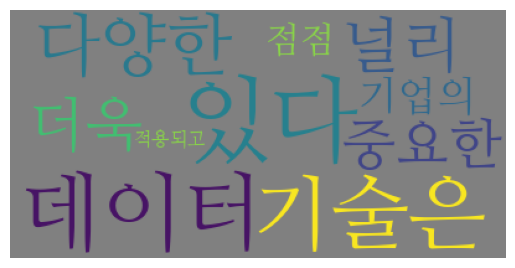

In [52]:
import matplotlib.pyplot as plt

plt.imshow(wordCloud)
plt.axis('off')

plt.show()